In [1]:
import sys
sys.path.append('..')

from pysauron.datasets import Avenue
from pysauron.transforms import RandomAnomalyInject, ChangeDirection, FrameDrop

import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
train_dataset = Avenue(root='../data/AvenueDataset/', test_mode=False, _debug=True)
test_dataset = Avenue(root='../data/AvenueDataset/', test_mode=True, _debug=True)

100.0%
100.0%


In [3]:
print('# Train samples: ', len(train_dataset))
print('# Test samples:  ', len(test_dataset))

# Train samples:  2845
# Test samples:   2620


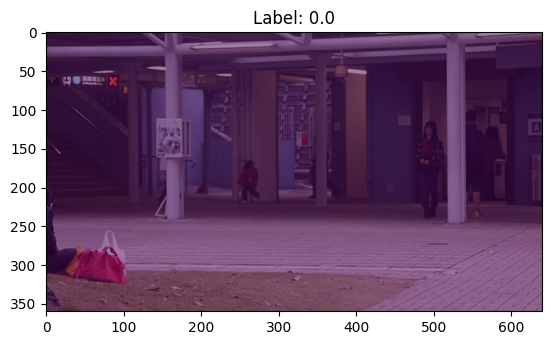

Sample temporal labels:  [0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [4]:
sample = test_dataset[75]

for i in range(sample[0].shape[0]):
    plt.imshow(sample[0][i])
    plt.imshow(sample[1][i], alpha=0.5)
    plt.title(f'Label: {sample[2][i]}')
    clear_output(True)
    plt.show()

print('Sample temporal labels: ', sample[2])

## Frame drop augmentation

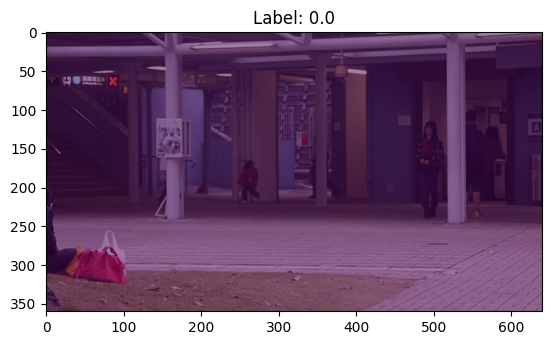

Sample temporal labels after transform:  [1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.]


In [5]:
sample = test_dataset[75]

video, label, temporal_l = FrameDrop(k=9, always_apply=True)(video=sample[0], label=sample[1], temporal_label=sample[2])

for i in range(video.shape[0]):
    plt.imshow(video[i])
    plt.imshow(label[i], alpha=0.5)
    plt.title(f'Label: {temporal_l[i]}')
    clear_output(True)
    plt.show()

print('Sample temporal labels after transform: ', temporal_l)

## Direction change augmentation

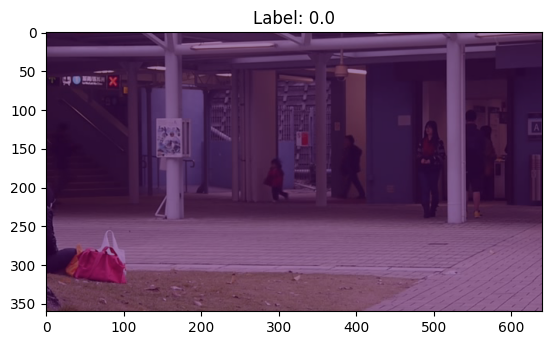

Sample temporal labels after transform:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]


In [6]:
sample = test_dataset[75]

video, label, temporal_l = ChangeDirection(always_apply=True)(video=sample[0], label=sample[1], temporal_label=sample[2])

for i in range(video.shape[0]):
    plt.imshow(video[i])
    plt.imshow(label[i], alpha=0.5)
    plt.title(f'Label: {temporal_l[i]}')
    clear_output(True)
    plt.show()

print('Sample temporal labels after transform: ', temporal_l)

## Randomg injection augmentation

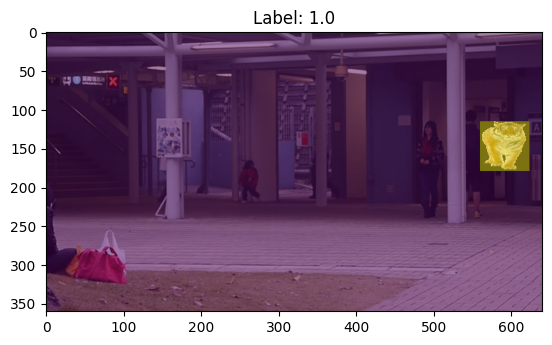

Sample temporal labels after transform:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
sample = test_dataset[75]

video, label, temporal_l = RandomAnomalyInject(
        anomaly_folder='/Users/bogdanivanyuk/Desktop/PySauron/pysauron/transforms/assets/anomalies/animals',
        always_apply=True)(video=sample[0], label=sample[1], temporal_label=sample[2])

for i in range(video.shape[0]):
    plt.imshow(video[i])
    plt.imshow(label[i], alpha=0.5)
    plt.title(f'Label: {temporal_l[i]}')
    clear_output(True)
    plt.show()

print('Sample temporal labels after transform: ', temporal_l)